In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import sklearn
import nltk

#Data

In [ ]:
credits=pd.read_csv('/content/drive/MyDrive/Movie_data/tmdb_5000_credits.csv')
movies=pd.read_csv('/content/drive/MyDrive/Movie_data/tmdb_5000_movies.csv')

In [ ]:
print('Dimension of movies ',movies.shape)
print('Dimension of credits ',credits.shape)
print(movies.info())
print(credits.info())

Dimension of movies  (4803, 20)
Dimension of credits  (4803, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_l

##merging both dataframes

In [ ]:
movies=movies.merge(credits,on='title')

##checking null values

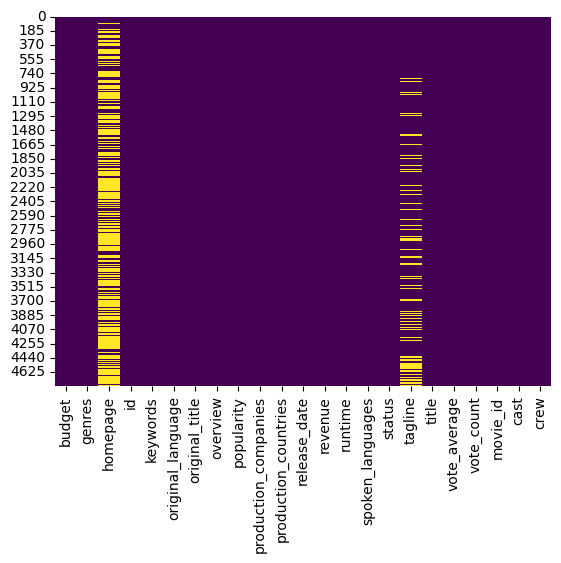

In [ ]:
sns.heatmap(movies.isnull(),cbar=False,cmap='viridis')
plt.show()

## keeping only required features

In [ ]:
movies=movies[['id','title','overview','genres','keywords','cast','crew']]
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies.dropna(inplace=True)
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Extraction of tags and new dataset

### Extraction of Genres and keywords.

In [ ]:
def convert(obj):
  l=[];
  for i in ast.literal_eval(obj):
    l.append(i['name'])
  return l;
movies['genres']= movies['genres'].apply(convert)
movies['keywords']= movies['keywords'].apply(convert)

###Extraction of cast

In [ ]:
def cast(obj):
  l=[]
  a=ast.literal_eval(obj)
  for i in range(4):
    l.append(a[i]['name'])
  return l
movies['cast']= movies['cast'].apply(convert)

###Extraction of Director

In [ ]:
def director(obj):
  l=[]
  for i in ast.literal_eval(obj):
    if i['job']=='Director':
      l.append(i['name'])
      break;
  return l
movies['crew']=movies['crew'].apply(director)

###Extracting Overview

In [ ]:
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [ ]:
movies['overview']=movies['overview'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


###combining these to make tag

In [ ]:
movies['tags']=movies['genres']+movies['overview']+movies['cast']+movies['crew']+movies['keywords']

###New dataset new_df

In [ ]:
new_df=movies[['id','title','tags']]
new_df['tags']=new_df['tags'].apply(lambda x: " ".join(x))
new_df['tags']=new_df['tags'].apply(lambda x: x.lower())
new_df.head()

<ipython-input-14-3d5e0c3ec99c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x: " ".join(x))
<ipython-input-14-3d5e0c3ec99c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x: x.lower())


,id,title,tags
0,19995,Avatar,action adventure fantasy sciencefiction in the...
1,285,Pirates of the Caribbean: At World's End,"adventure fantasy action captain barbossa, lon..."
2,206647,Spectre,action adventure crime a cryptic message from ...
3,49026,The Dark Knight Rises,action crime drama thriller following the deat...
4,49529,John Carter,action adventure sciencefiction john carter is...


In [ ]:
from nltk.stem.porter import PorterStemmer as PS
ps=PS()

In [ ]:
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)
  new_df['tags']=new_df['tags'].apply(stem)

##Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=6000,stop_words='english')
vector=cv.fit_transform(new_df['tags']).toarray()
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(cv.get_feature_names_out().size)

6000


#Main function

##Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity as cos
similarity_matrix=cos(vector)

In [ ]:
similarity_matrix

array([[1.        , 0.06454972, 0.04811252, ..., 0.02151657, 0.02405626,
        0.        ],
       [0.06454972, 1.        , 0.0745356 , ..., 0.02222222, 0.        ,
        0.        ],
       [0.04811252, 0.0745356 , 1.        , ..., 0.0248452 , 0.        ,
        0.        ],
       ...,
       [0.02151657, 0.02222222, 0.0248452 , ..., 1.        , 0.0745356 ,
        0.04600437],
       [0.02405626, 0.        , 0.        , ..., 0.0745356 , 1.        ,
        0.05143445],
       [0.        , 0.        , 0.        , ..., 0.04600437, 0.05143445,
        1.        ]])

In [ ]:
similarity_matrix.shape

(4806, 4806)

## judging

In [ ]:
def recommend(movie):
  index=new_df[new_df['title']==movie].index[0]
  L=sorted(list(enumerate(similarity_matrix[index])),reverse=True,key=lambda x: x[1])[1:6:1]
  recommendations=[]
  for i in L:
    recommendations.append(new_df['title'][i[0]])
  print(recommendations)
  return

In [ ]:
movie = input("Enter your current movie: ")
recommend(movie)

Enter your current movie: Avatar
['Lifeforce', 'Battle: Los Angeles', 'Aliens vs Predator: Requiem', 'Titan A.E.', 'Independence Day']


In [ ]:
recommend('The Dark Knight Rises')

['The Dark Knight', 'Batman Begins', 'Batman', 'Batman Returns', 'Batman Forever']


In [ ]:
import pickle

# Assuming new_df is your dataframe
pickle.dump(new_df, open('movies.pkl', 'wb'))

In [ ]:
new_df['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [ ]:
pickle.dump(similarity_matrix,open('similarity.pkl','wb'))